In [1]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import recall_score, precision_score, roc_curve, f1_score, confusion_matrix

import seaborn as sns
import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 문제

feature: pclass, sex, fare
label: survived
1. 1등급, female, 32달러 인경우 생사유무를 예측하시요 
2. train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.
5~ 8 .titanic 통계값을 구하시요(문제는 자율)


In [3]:
# 문제에 맞는 데이터 만들기

x_data = titanic.loc[:,['pclass', 'sex', 'fare']]
y_data = titanic.loc[:,['survived']]
display(x_data.head(3))
display(y_data.head(3))

,pclass,sex,fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250


,survived
0,0
1,1
2,1


In [4]:
# sex 문자열 Encoding
pd.get_dummies(x_data['sex'])
x_data = pd.get_dummies(x_data)
x_data = x_data.drop('sex_male', axis=1)
x_data.head(3)

,pclass,fare,sex_female
0,3,7.2500,0
1,1,71.2833,1
2,3,7.9250,1


# 1. 1등급, female, 32달러 인경우 생사유무를 예측하시요 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1, stratify=y_data)

In [6]:
model_logistic = make_pipeline( StandardScaler(), LogisticRegression() )
model_logistic.fit(x_train, y_train)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## 1번 결과

In [90]:
p = model_logistic.predict_proba([[1,32.1,0]])
p

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# 2. train, test, f1 score 를 구하시요

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score # 남성의 경우

In [9]:
y_train_pred = model_logistic.predict(x_train)
cm_train = confusion_matrix(y_train, y_train_pred)

print('train_f1_score: ', f1_score(y_train, y_train_pred))

train_f1_score:  0.7073170731707318


In [10]:
y_test_pred = model_logistic.predict(x_test)
cm_test = confusion_matrix(y_test, y_test_pred)

print('test_f1_score: ', f1_score(y_test, y_test_pred))

test_f1_score:  0.7349397590361445


# 3. confusion matrix 를 구하고 heatmap 을 그리시요.

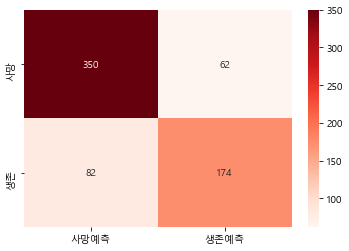

In [11]:
sns.heatmap(cm_train, annot=True, cmap='Reds', yticklabels=['사망','생존'],
           xticklabels=['사망예측','생존예측'], fmt='d')
plt.show()

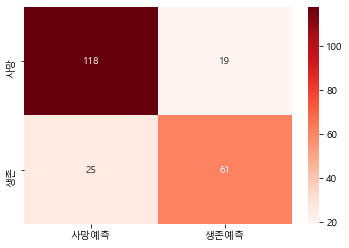

In [12]:
sns.heatmap(cm_test, annot=True, cmap='Reds', yticklabels=['사망','생존'],
           xticklabels=['사망예측','생존예측'], fmt='d')
plt.show()

# 4. roc curve 를 그리시요.



In [21]:
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [22]:
p = model_lr.predict_proba(x_test)
p

array([[0.90257103, 0.09742897],
       [0.90247142, 0.09752858],
       [0.40659687, 0.59340313],
       [0.89997853, 0.10002147],
       [0.08752776, 0.91247224],
       [0.902557  , 0.097443  ],
       [0.90257601, 0.09742399],
       [0.90257329, 0.09742671],
       [0.55970134, 0.44029866],
       [0.77999557, 0.22000443],
       [0.90256243, 0.09743757],
       [0.41359459, 0.58640541],
       [0.21256446, 0.78743554],
       [0.57192982, 0.42807018],
       [0.90256017, 0.09743983],
       [0.41359459, 0.58640541],
       [0.57318296, 0.42681704],
       [0.09230389, 0.90769611],
       [0.9017256 , 0.0982744 ],
       [0.90169276, 0.09830724],
       [0.41362581, 0.58637419],
       [0.89999104, 0.10000896],
       [0.41018271, 0.58981729],
       [0.08038889, 0.91961111],
       [0.77999557, 0.22000443],
       [0.90251626, 0.09748374],
       [0.90264386, 0.09735614],
       [0.41362581, 0.58637419],
       [0.90256469, 0.09743531],
       [0.56244514, 0.43755486],
       [0.

In [57]:
df = y_test
df

,survived,proba
391,1,0.097429
584,0,0.097529
610,0,0.593403
261,1,0.100021
496,1,0.912472
...,...,...
434,0,0.435708
331,0,0.427406
559,1,0.589262
376,1,0.586224


In [58]:
df['proba'] = p[:,1]
df

C:\Users\medici\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,survived,proba
391,1,0.097429
584,0,0.097529
610,0,0.593403
261,1,0.100021
496,1,0.912472
...,...,...
434,0,0.435708
331,0,0.427406
559,1,0.589262
376,1,0.586224


In [59]:
# df정렬
df.sort_values(by='proba')

,survived,proba
271,1,0.096586
326,0,0.097260
371,0,0.097288
411,0,0.097327
804,1,0.097340
...,...,...
700,1,0.926119
380,1,0.926119
311,1,0.929011
341,1,0.929062


In [60]:
fpr, tpr, thresholds = roc_curve(y_test, df['proba'].values)
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

ValueError: continuous-multioutput format is not supported

In [ ]:
안나와여ㅜ

자율과제

In [61]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


상관관계 분석 후 히트맵으로 표시

In [77]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [87]:
df1 =titanic[['pclass', 'sex', 'fare','parch', 'survived']]
df1

,pclass,sex,fare,parch,survived
0,3,male,7.2500,0,0
1,1,female,71.2833,0,1
2,3,female,7.9250,0,1
3,1,female,53.1000,0,1
4,3,male,8.0500,0,0
...,...,...,...,...,...
886,2,male,13.0000,0,0
887,1,female,30.0000,0,1
888,3,female,23.4500,2,0
889,1,male,30.0000,0,1


In [88]:
import seaborn as sb
import matplotlib.pyplot as plt

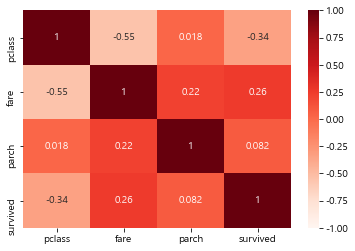

In [89]:
sb.heatmap(df1.corr(), annot=True, vmin = -1, vmax = 1, cmap='Reds')
plt.show()

### 6. feature에 parch를 추가하고 test데이터의 f1-score를 구하시오.

In [69]:
# x_data에 parch 열을 추가해서 재정의
x_data = titanic[['pclass', 'sex', 'fare', 'parch']]
x_data = pd.get_dummies(x_data)
y_data = titanic[['survived']]

# train, test 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=1)

# 모델링: 그리드서치
model_logistic = make_pipeline(StandardScaler(), LogisticRegression())
param_value = {'logisticregression__C': np.linspace(0,1,50),
              'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'logisticregression__solver' : ['liblinear', 'sag','saga','newton-cg','lbfgs']}
gridS = GridSearchCV(model_logistic, param_grid=param_value, scoring='f1')
gridS.fit(x_train,y_train)

# 최적 모델에서 예측값을 y_pred에 저장
y_pred = gridS.best_estimator_.predict(x_test)

# f1 sore 확인
f1_score(y_test, y_pred)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1358, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(

0.7194244604316548

In [70]:
# 데이터 프레임 정의
df1 = titanic[['pclass', 'sex', 'fare', 'parch','survived']]
df1 = pd.get_dummies(df1)

# vif 모듈 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif 데이터 프레임 생성
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df1.values,i ) for i in range(df1.shape[1])]
vif['feature'] = df1.columns
vif


,VIF Factor,feature
0,1.582005,pclass
1,1.555745,fare
2,1.140623,parch
3,1.587511,survived
4,8.710427,sex_female
5,11.719077,sex_male


In [ ]:
vif>10 값 제거 후 다시 vif구하기.